# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities = pd.Series(cities).str.capitalize().tolist()

len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
import json
from pprint import pprint

url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
weather_url = f'{url}appid={weather_api_key}&units={units}&q='

templist = []
citynolist = []
city_name = []
hum = []
lat = []
lng = []
max_temp = []
cloudiness = []
wind_speed =[]
country = []
date = []

for city in cities:
    response = requests.get(weather_url + city).json()
    
    try:
        temp = response['main']['temp']
        cityno = response['id']
        templist.append(temp)
        citynolist.append(cityno)
        hum.append(response['main']['humidity'])
        city_name.append(city)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'The temperature in {city}, which ID is {cityno}, is of {temp} celsius.')
        
    except:
        print(f'{city} was not found.')
        continue

The temperature in Avarua, which ID is 4035715, is of 29 celsius.
The temperature in Plettenberg bay, which ID is 964712, is of 21.96 celsius.
The temperature in Siniscola, which ID is 3166509, is of 5 celsius.
The temperature in Provideniya, which ID is 4031574, is of -11.42 celsius.
The temperature in Codrington, which ID is 2171099, is of 16.58 celsius.
The temperature in Lufilufi, which ID is 4035249, is of 30.78 celsius.
The temperature in Hermanus, which ID is 3366880, is of 16.67 celsius.
The temperature in Hangu, which ID is 1808931, is of 1.57 celsius.
The temperature in Te anau, which ID is 2181625, is of 13.7 celsius.
Taolanaro was not found.
The temperature in Eureka, which ID is 5563397, is of 11.27 celsius.
The temperature in Dargaville, which ID is 2191911, is of 23.64 celsius.
The temperature in Busselton, which ID is 2075265, is of 21.11 celsius.
The temperature in Longyearbyen, which ID is 2729907, is of -14 celsius.
The temperature in Butaritari, which ID is 2110227,

The temperature in Ayna, which ID is 3946962, is of 16.95 celsius.
The temperature in Lasa, which ID is 3175096, is of -10.75 celsius.
Belushya guba was not found.
The temperature in Alexandria, which ID is 361058, is of 12 celsius.
The temperature in Taoudenni, which ID is 2450173, is of 20.87 celsius.
The temperature in Mahebourg, which ID is 934322, is of 25 celsius.
The temperature in Kiruna, which ID is 605155, is of -18 celsius.
The temperature in Sitka, which ID is 5557293, is of 3 celsius.
The temperature in Kachug, which ID is 2023333, is of -22.4 celsius.
The temperature in Gorontalo, which ID is 1643837, is of 27.16 celsius.
The temperature in Upernavik, which ID is 3418910, is of -14.79 celsius.
The temperature in Castro, which ID is 3466704, is of 16.95 celsius.
The temperature in Ancud, which ID is 3899695, is of 11.88 celsius.
The temperature in Caravelas, which ID is 3466980, is of 23.9 celsius.
The temperature in Narsaq, which ID is 3421719, is of 7 celsius.
The temper

The temperature in Fonte boa, which ID is 6319315, is of 24.67 celsius.
The temperature in Hounde, which ID is 2360073, is of 24.86 celsius.
The temperature in Port alfred, which ID is 964432, is of 23.33 celsius.
The temperature in Carnarvon, which ID is 2074865, is of 28 celsius.
The temperature in Baghdad, which ID is 98182, is of 12 celsius.
The temperature in Severo-kurilsk, which ID is 2121385, is of -3.04 celsius.
The temperature in Alihe, which ID is 2038665, is of -19.68 celsius.
The temperature in Saldanha, which ID is 3361934, is of 19 celsius.
The temperature in Kamina, which ID is 214614, is of 18.56 celsius.
The temperature in Ouadda, which ID is 236901, is of 21.22 celsius.
The temperature in Bud, which ID is 4255151, is of -5.93 celsius.
The temperature in Chuy, which ID is 3443061, is of 21.1 celsius.
The temperature in Lhokseumawe, which ID is 1214658, is of 25.82 celsius.
Attawapiskat was not found.
The temperature in Tiksi, which ID is 2015306, is of -26.34 celsius.

The temperature in Fushan, which ID is 1810920, is of 6.76 celsius.
The temperature in Howard springs, which ID is 6301965, is of 29.3 celsius.
Turtkul was not found.
The temperature in Carutapera, which ID is 3402648, is of 25.51 celsius.
The temperature in Xichang, which ID is 1789647, is of 12.78 celsius.
The temperature in Esperance, which ID is 2071860, is of 19 celsius.
Sorvag was not found.
The temperature in Severo-yeniseyskiy, which ID is 1492566, is of -28.88 celsius.
The temperature in Laguna, which ID is 5364271, is of 17 celsius.
The temperature in Dijkot, which ID is 1179834, is of 12.33 celsius.
The temperature in Katangli, which ID is 2122783, is of -7.75 celsius.
The temperature in Ledyard, which ID is 4837648, is of -1.95 celsius.
The temperature in Tuatapere, which ID is 2180815, is of 14.39 celsius.
The temperature in Broken hill, which ID is 2173911, is of 21 celsius.
The temperature in Luoyang, which ID is 1801792, is of 12.78 celsius.
The temperature in Saint ant

The temperature in Cabudare, which ID is 3647637, is of 22.58 celsius.
The temperature in Rionero in vulture, which ID is 3169326, is of -4.72 celsius.
The temperature in Prince rupert, which ID is 6113406, is of 3 celsius.
The temperature in Koumac, which ID is 2140558, is of 28.85 celsius.
The temperature in Skibbereen, which ID is 2961459, is of 9 celsius.
The temperature in Mandera, which ID is 187896, is of 24.12 celsius.
The temperature in Bulungu, which ID is 2316259, is of 22.28 celsius.
The temperature in Borogontsy, which ID is 2026160, is of -26.31 celsius.
The temperature in Stanceni, which ID is 666126, is of -13.33 celsius.
The temperature in Fort nelson, which ID is 5955902, is of -16 celsius.
The temperature in Poum, which ID is 2138555, is of 27.23 celsius.
Grand river south east was not found.
The temperature in Gat, which ID is 293842, is of 10.56 celsius.
The temperature in San luis, which ID is 3837056, is of 21.62 celsius.
The temperature in West bay, which ID is 

The temperature in Bengkulu, which ID is 1649150, is of 26.34 celsius.
The temperature in Bukoba, which ID is 160961, is of 19 celsius.
The temperature in San pedro de lloc, which ID is 3692310, is of 23.9 celsius.
The temperature in Ormara, which ID is 1168700, is of 20.28 celsius.
The temperature in Vila, which ID is 7117100, is of 9.44 celsius.
The temperature in Thinadhoo, which ID is 1337610, is of 27.96 celsius.
The temperature in Lorengau, which ID is 2092164, is of 28.1 celsius.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df = pd.DataFrame({
    'city_name':city_name,
    'lat':lat,
    'lng':lng,
    'max_temp':max_temp,
    'temperature':templist,
    'humidity':hum,
    'cloudiness':cloudiness,
    'wind_speed':wind_speed,
    'country':country,
    'date':date
})
cities_df2 = cities_df[['city_name','lat','lng','max_temp','humidity','cloudiness','wind_speed','country','date']]
cities_df2.columns = ['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']
cities_df2.to_csv('../output_data/cities_dataframe.csv', index=False)

In [5]:
cities_df

,city_name,lat,lng,max_temp,temperature,humidity,cloudiness,wind_speed,country,date
0,Avarua,-21.2078,-159.7750,29.00,29.00,74,20,3.09,CK,1613263913
1,Plettenberg bay,-34.0527,23.3716,21.96,21.96,93,88,2.30,ZA,1613264019
2,Siniscola,40.5719,9.6922,5.00,5.00,65,40,6.69,IT,1613264019
3,Provideniya,64.3833,-173.3000,-11.42,-11.42,92,100,7.90,RU,1613263881
4,Codrington,-38.2667,141.9667,16.58,16.58,65,100,4.64,AU,1613264020
...,...,...,...,...,...,...,...,...,...,...
569,San pedro de lloc,-7.4328,-79.5058,23.90,23.90,66,98,6.40,PE,1613264123
570,Ormara,25.2088,64.6357,20.28,20.28,63,0,3.34,PK,1613264123
571,Vila,42.0304,-8.1588,9.44,9.44,95,99,0.89,PT,1613264123
572,Thinadhoo,0.5333,72.9333,27.96,27.96,73,16,3.72,MV,1613264123


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
cities_df.sort_values(by='humidity', ascending=False)

,city_name,lat,lng,max_temp,temperature,humidity,cloudiness,wind_speed,country,date
544,Dillon,34.4166,-79.3712,3.89,3.41,100,90,3.60,US,1613264118
491,Hambantota,6.1241,81.1185,24.00,24.00,100,13,0.51,LK,1613264108
112,Huntsville,34.7304,-86.5861,1.11,-0.12,100,90,4.63,US,1613264040
535,Martapura,-3.4167,114.8500,24.00,24.00,100,40,2.06,ID,1613264117
265,Tawau,4.2498,117.8871,24.00,24.00,100,20,1.97,MY,1613264067
...,...,...,...,...,...,...,...,...,...,...
281,Douentza,14.9951,-2.9517,22.69,22.69,18,0,2.10,ML,1613264070
75,Sindou,10.6667,-5.1667,24.86,24.86,17,0,1.34,BF,1613264033
226,Hounde,11.5000,-3.5167,24.86,24.86,16,0,2.13,BF,1613264060
553,Goundam,16.4145,-3.6708,24.60,24.60,16,0,3.69,ML,1613264120


In [7]:
cities_h = cities_df[cities_df['humidity'] <= 100].reset_index(drop=True)
cities_h

,city_name,lat,lng,max_temp,temperature,humidity,cloudiness,wind_speed,country,date
0,Avarua,-21.2078,-159.7750,29.00,29.00,74,20,3.09,CK,1613263913
1,Plettenberg bay,-34.0527,23.3716,21.96,21.96,93,88,2.30,ZA,1613264019
2,Siniscola,40.5719,9.6922,5.00,5.00,65,40,6.69,IT,1613264019
3,Provideniya,64.3833,-173.3000,-11.42,-11.42,92,100,7.90,RU,1613263881
4,Codrington,-38.2667,141.9667,16.58,16.58,65,100,4.64,AU,1613264020
...,...,...,...,...,...,...,...,...,...,...
569,San pedro de lloc,-7.4328,-79.5058,23.90,23.90,66,98,6.40,PE,1613264123
570,Ormara,25.2088,64.6357,20.28,20.28,63,0,3.34,PK,1613264123
571,Vila,42.0304,-8.1588,9.44,9.44,95,99,0.89,PT,1613264123
572,Thinadhoo,0.5333,72.9333,27.96,27.96,73,16,3.72,MV,1613264123


In [8]:
cities_df.columns

Index(['city_name', 'lat', 'lng', 'max_temp', 'temperature', 'humidity',
       'cloudiness', 'wind_speed', 'country', 'date'],
      dtype='object')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
humidity = cities_df['humidity']

quartiles = humidity.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

cities_df_clean = cities_df[['city_name', 'lat', 'lng', 'max_temp', 'temperature',
       'humidity', 'cloudiness', 'wind_speed', 'country', 'date']]

for index,rows in cities_df_clean.iterrows():
    if rows['humidity'] > upper_bound or rows['humidity'] < lower_bound:
        cities_df_clean.drop(index,inplace=True)
    else:
        pass
    
cities_df_clean = cities_df_clean.reset_index(drop=True)
cities_df_clean

,city_name,lat,lng,max_temp,temperature,humidity,cloudiness,wind_speed,country,date
0,Avarua,-21.2078,-159.7750,29.00,29.00,74,20,3.09,CK,1613263913
1,Plettenberg bay,-34.0527,23.3716,21.96,21.96,93,88,2.30,ZA,1613264019
2,Siniscola,40.5719,9.6922,5.00,5.00,65,40,6.69,IT,1613264019
3,Provideniya,64.3833,-173.3000,-11.42,-11.42,92,100,7.90,RU,1613263881
4,Codrington,-38.2667,141.9667,16.58,16.58,65,100,4.64,AU,1613264020
...,...,...,...,...,...,...,...,...,...,...
542,San pedro de lloc,-7.4328,-79.5058,23.90,23.90,66,98,6.40,PE,1613264123
543,Ormara,25.2088,64.6357,20.28,20.28,63,0,3.34,PK,1613264123
544,Vila,42.0304,-8.1588,9.44,9.44,95,99,0.89,PT,1613264123
545,Thinadhoo,0.5333,72.9333,27.96,27.96,73,16,3.72,MV,1613264123


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

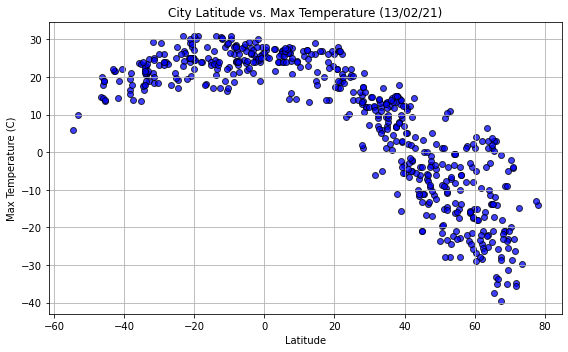

If the city's latitude is further away from 0, its max temperature gets lower.


In [11]:
lat_axis = cities_df_clean['lat']
temp_axis = cities_df_clean['max_temp']

plt.figure(figsize=(8,5))
plt.scatter(lat_axis, temp_axis, facecolor='blue', edgecolor='black', alpha=0.75)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (13/02/21)')
plt.tight_layout()
plt.savefig('../output_data/01 Lat v maxtemp.png')
plt.show()
print("If the city's latitude is further away from 0, its max temperature gets lower.")

## Latitude vs. Humidity Plot

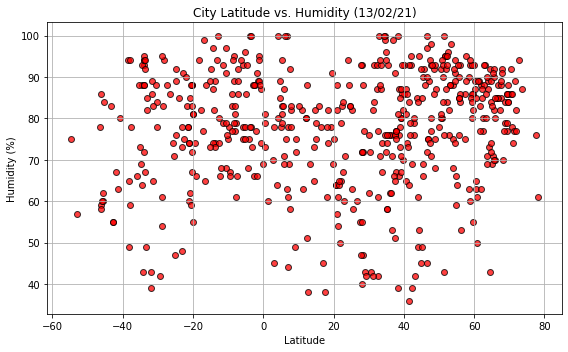

This analysis shows how the humidity has a low pearson correlation with latitude.


In [12]:
hum_axis = cities_df_clean['humidity']

plt.figure(figsize=(8,5))
plt.scatter(lat_axis, hum_axis, facecolor='red', edgecolor='black', alpha=0.75)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (13/02/21)')
plt.tight_layout()
plt.savefig('../output_data/02 Lat v humidity.png')
plt.show()
print('This analysis shows how the humidity has a low pearson correlation with latitude.')

## Latitude vs. Cloudiness Plot

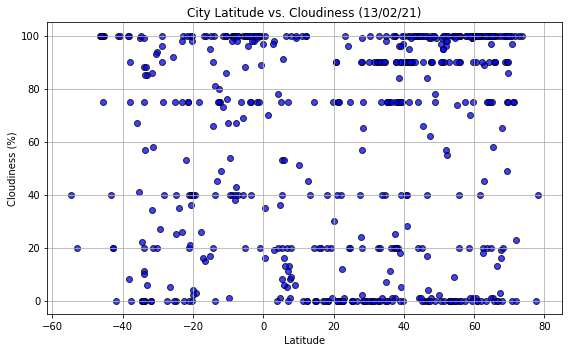

This analysis shows how the cloudiness has a low pearson correlation with latitude.


In [13]:
cloud_axis = cities_df_clean['cloudiness']

plt.figure(figsize=(8,5))
plt.scatter(lat_axis, cloud_axis, facecolor='blue', edgecolor='black', alpha=0.75)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (13/02/21)')
plt.tight_layout()
plt.savefig('../output_data/03 Lat v cloudiness.png')
plt.show()
print('This analysis shows how the cloudiness has a low pearson correlation with latitude.')

## Latitude vs. Wind Speed Plot

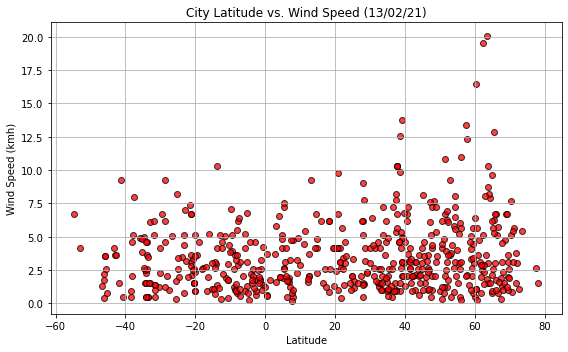

This analysis shows how the wind speed has a low pearson correlation with latitude.


In [14]:
wind_axis = cities_df_clean['wind_speed']

plt.figure(figsize=(8,5))
plt.scatter(lat_axis, wind_axis, facecolor='red', edgecolor='black', alpha=0.75)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kmh)')
plt.title('City Latitude vs. Wind Speed (13/02/21)')
plt.tight_layout()
plt.savefig('../output_data/04 Lat v wind speed.png')
plt.show()
print('This analysis shows how the wind speed has a low pearson correlation with latitude.')

## Linear Regression

In [15]:
cities_df_clean.columns

Index(['city_name', 'lat', 'lng', 'max_temp', 'temperature', 'humidity',
       'cloudiness', 'wind_speed', 'country', 'date'],
      dtype='object')

In [16]:
northern = cities_df_clean[cities_df_clean['lat'] >= 0].reset_index(drop=True)
southern = cities_df_clean[cities_df_clean['lat'] < 0].reset_index(drop=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.86641225872972


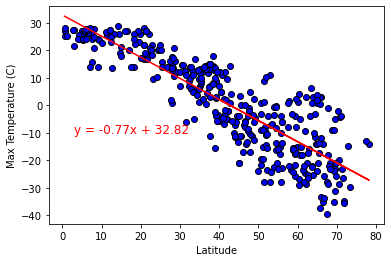

In [17]:
nlat_axis = northern['lat']
ntemp_axis = northern['max_temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat_axis, ntemp_axis)
regress_values = nlat_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(nlat_axis, ntemp_axis, color='blue', edgecolor='black')
plt.plot(nlat_axis,regress_values,"r-")
plt.annotate(line_eq,(3,-10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/05 northern latitude vs max temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5717344927887879


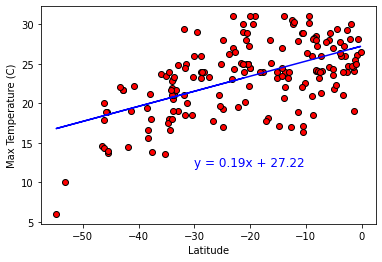

We can see how in the southern hemisphere the max temp goes up while getting closer to latitude 0
and in the northern we can see how it goes down while gettig further away from latitude 0


In [18]:
slat_axis = southern['lat']
stemp_axis = southern['max_temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(slat_axis, stemp_axis)
regress_values = slat_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(slat_axis, stemp_axis, color='red', edgecolor='black')
plt.plot(slat_axis,regress_values,"blue")
plt.annotate(line_eq,(-30,12),fontsize=12,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/06 southern latitude vs max temp.png')
plt.show()
print('We can see how in the southern hemisphere the max temp goes up while getting closer to latitude 0\n'\
      'and in the northern we can see how it goes down while gettig further away from latitude 0')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2397680969770658


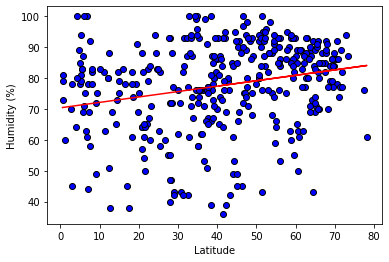

In [19]:
nhum_axis = northern['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat_axis, nhum_axis)
regress_values = nlat_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(nlat_axis, nhum_axis, color='blue', edgecolor='black')
plt.plot(nlat_axis,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/07 northern latitude vs humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.30075762273431594


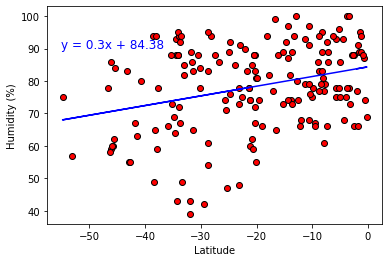

We can see how both scatter plots complement each other. We can see in the regression that its trend is positive.


In [20]:
shum_axis = southern['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(slat_axis, shum_axis)
regress_values = slat_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(slat_axis, shum_axis, color='red', edgecolor='black')
plt.plot(slat_axis,regress_values,"blue")
plt.annotate(line_eq,(-55,90),fontsize=12,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/08 southern latitude vs humidity.png')
plt.show()
print('We can see how both scatter plots complement each other. We can see in the regression that its trend is positive.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2598624112169293


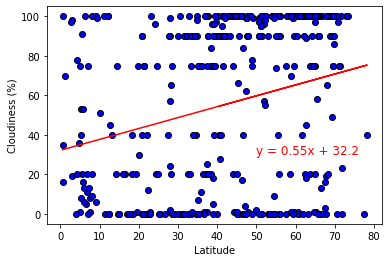

In [21]:
ncloud_axis = northern['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat_axis, ncloud_axis)
regress_values = nlat_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(nlat_axis, ncloud_axis, color='blue', edgecolor='black')
plt.plot(nlat_axis,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/09 northern latitude vs cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.248112280829095


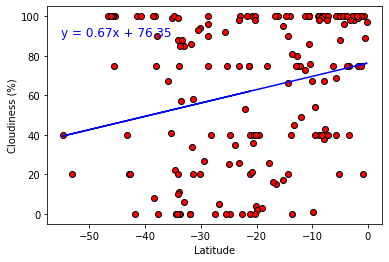

In the Northern Hemisphere, its regression slope is bigger than the souther one.


In [22]:
scloud_axis = southern['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(slat_axis, scloud_axis)
regress_values = slat_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(slat_axis, scloud_axis, color='red', edgecolor='black')
plt.plot(slat_axis,regress_values,"blue")
plt.annotate(line_eq,(-55,90),fontsize=12,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/10 southern latitude vs cloudiness.png')
plt.show()
print('In the Northern Hemisphere, its regression slope is bigger than the souther one.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11634570610449065


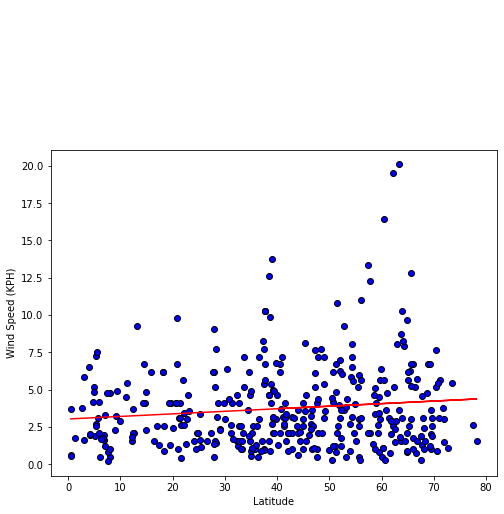

In [23]:
nwind_axis = northern['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat_axis, nwind_axis)
regress_values = nlat_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.figure(figsize=(8,6))
plt.scatter(nlat_axis, nwind_axis, color='blue', edgecolor='black')
plt.plot(nlat_axis,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (KPH)')
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/11 northern latitude vs wind speed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.11221525161906594


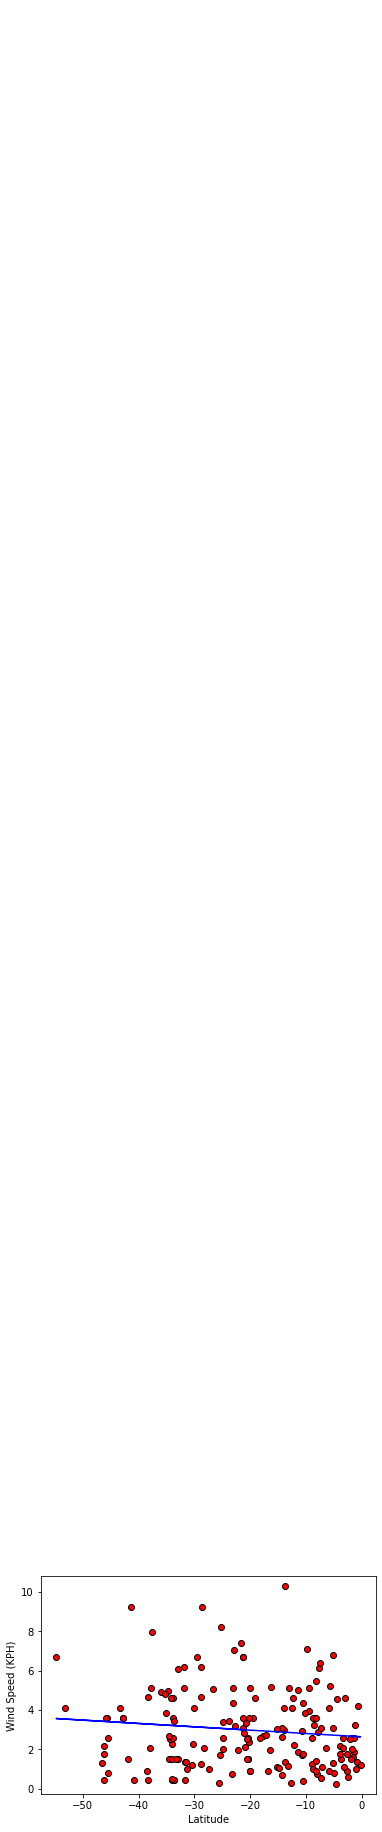

In the southern hemisphere, we can see that the slope is negative, while in the northern hemisphere is positive


In [24]:
swind_axis = southern['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(slat_axis, swind_axis)
regress_values = slat_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(slat_axis, swind_axis, color='red', edgecolor='black')
plt.plot(slat_axis,regress_values,"blue")
plt.annotate(line_eq,(-55,90),fontsize=12,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (KPH)')
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/12 southern latitude vs wind speed.png')
plt.show()
print('In the southern hemisphere, we can see that the slope is negative, while in the northern hemisphere is positive')